# Lab 1: Loading, Cleaning and Saving Breast Cancer Data

In this lab we'll read up data, data_sets/lab_1_data.csv, sourced from [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data), as a pandas dataframe. We'll add headers to the dataframe, do some simple descriptive analysis of the dataset and save as a new csv file. 


#### Libraries used in this lab:
[pandas docs](https://pandas.pydata.org/pandas-docs/stable/)

[seaborn docs](https://seaborn.pydata.org/)

In [1]:
# import python libraries we'll need
import pandas as pd
import seaborn as sns

## Load Data

In [4]:
# read in data from local file path, print out first 5 rows
# note date has no column names
data = pd.read_csv("data_sets/lab_1_data.csv", header=None)
data.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Set Headers
According to data scource, the first two columns represent the patiend ID and the Diagnosis (M: Malignant, B:Benign.)
The following columns (3-32) represent three types of measurments (mean, standard error, worst) for the following features:
    'radius',
    'texture',
    'perimeter',
    'area',
    'smoothness',
    'compactness',
    'concavity',
    'concave_points',
    'symmetry',
    'fractal_dimension'
   
In this section we create the column names with the above information with for loops

In [3]:
# initialize column list, add identity, diagonosis and feature measurement columns
data_set_columns = []

identity_and_diagnosis = ['id', 'diagnosis']

feature_types = [
    'radius',
    'texture',
    'perimeter',
    'area',
    'smoothness',
    'compactness',
    'concavity',
    'concave_points',
    'symmetry',
    'fractal_dimension'
]

measurement_types = [
    'mean',
    'standard_error',
    'worst'
]

#add the identity columns
data_set_columns.extend(identity_and_diagnosis)

#add the feature columns for each measurement type
for measurement in measurement_types:
    for feature in feature_types:
        data_set_columns.append('_'.join([feature, measurement]))    
        
# set column names for breast cancer data set
data.columns = data_set_columns

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exercise 1: Describe pandas dataframe

Using this `pandas.Dataframe.describe` [pandas doc as a reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html), call the method that will provide desriptive statistics on individual columns within the breast cancer `data` dataframe.

In [ ]:
# complete code snippet below to calculate descriptive stats of data columns
data.

## Visualize counts of patients with Benign vs Malignant tumors


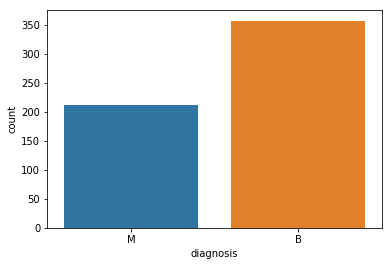

In [4]:
sns.countplot(data['diagnosis'])

## Exercise 2: Plot histogram of `radius_mean` column

Using the `seaborn.distplot` [seaborn doc as a reference](https://seaborn.pydata.org/generated/seaborn.distplot.html), create a histogram of the `radius_mean` column. What does the histogram tell you? Which value range for `radius_mean` appears most frequently within the dataset?

In [ ]:
# the following function is missing an argument, please fill it in 
sns.distplot() 

In [6]:
# save files to `data_sets` folder
data.to_csv("data_sets/data_with_column_names.csv", index=False)